# EXERCISE 7.5.1.1 & 7.5.2.1- Covariation

In [1]:
library(tidyverse)
library(nycflights13)
library(ggstance)
library(lvplot)
library(ggbeeswarm)

── Attaching packages ─────────────────────────────────────── tidyverse 1.2.1 ──

✔ ggplot2 3.2.1     ✔ purrr   0.3.3
✔ tibble  2.1.3     ✔ dplyr   0.8.3
✔ tidyr   1.0.0     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.4.0

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


Attaching package: ‘ggstance’


The following objects are masked from ‘package:ggplot2’:

    geom_errorbarh, GeomErrorbarh




## 1. Use what you have learnt to improve the visualisation of the departure times of cancelled vs non_cancelled flights. 

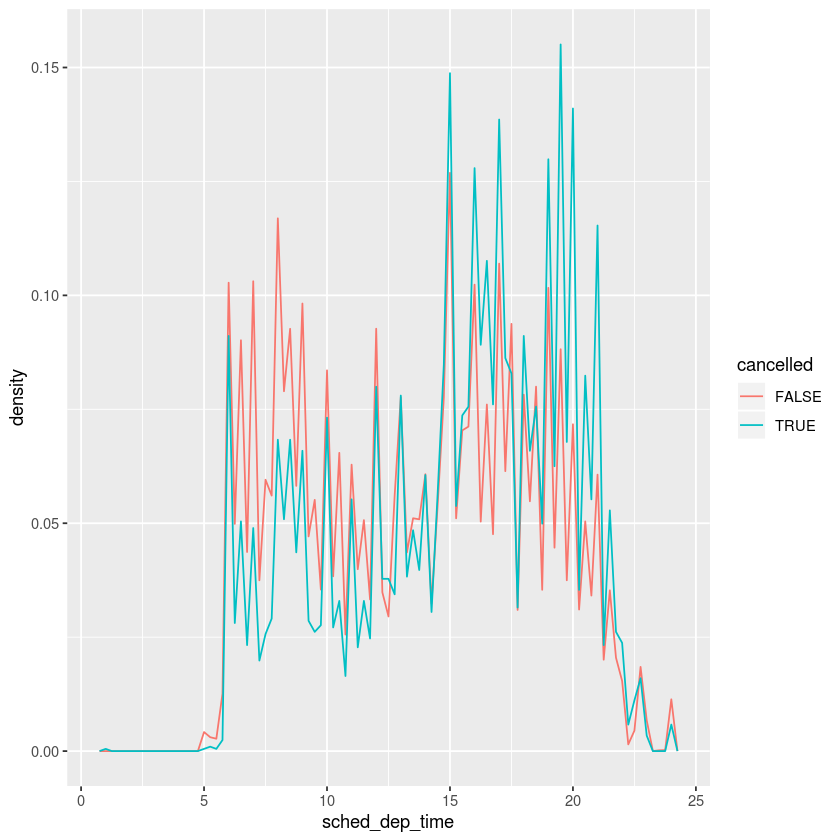

In [2]:
flights %>% mutate(cancelled = is.na(dep_time), 
                   sched_hour = sched_dep_time %/% 100,
                   sched_min = sched_dep_time %% 100, 
                   sched_dep_time = sched_hour + sched_min/60) %>%
  ggplot(mapping = aes(x = sched_dep_time, y = ..density..)) + 
  geom_freqpoly(mapping = aes(colour = cancelled), binwidth = .25)

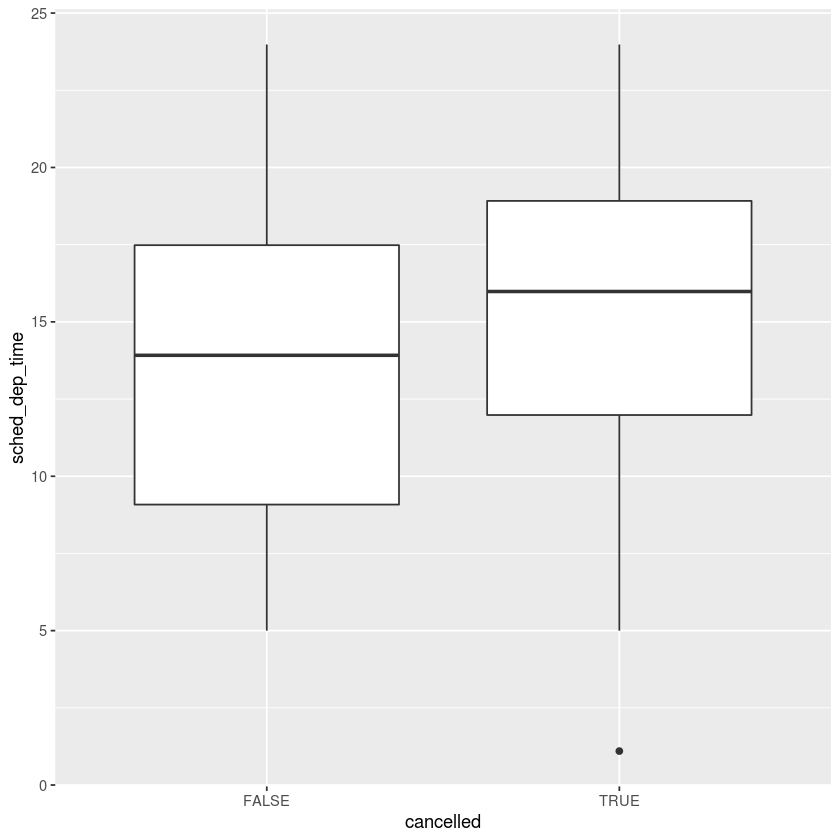

In [3]:
flights %>% mutate(cancelled = is.na(dep_time), 
                   sched_hour = sched_dep_time %/% 100, 
                   sched_min = sched_dep_time %% 100, 
                   sched_dep_time = sched_hour + sched_min / 60) %>%
  ggplot(mapping = aes(x = cancelled, y = sched_dep_time)) +
  geom_boxplot()

Answer: The 1st plot, a frequency polygon, shows the distribution of cancelled vs non-cancelled flights when scheduled time departure is plotted against its density. We can learn that cancelled flights were highest in the afternoon (blue line - TRUE) and lowest in the morning hours (between 5 am and midday).

The 2nd plot, a boxplot, shows that the cancelled flights were mostly distributed between the mid to late afternoons. But the above plot also shows that most flights in general were between 9 am to 7 pm, and then the individual boxplots shows the distribution of cancelled vs non-cancelled flights during this period. This plot also explains the frequency polygon above which shows that cancelled flights were more in the afternoon.

## 2. What variable in the diamonds dataset is most important for predicting the price of a diamond? How is that variable corelated with cut? Why does the combination of these 2 relationships lead to lower quality diamonds being more expensive?

a) From the scatter plot below (after performing scatterplots for all variables vs the price), carat seems to have the most influence on the price of a diamond, therefore the best for predicting the price..

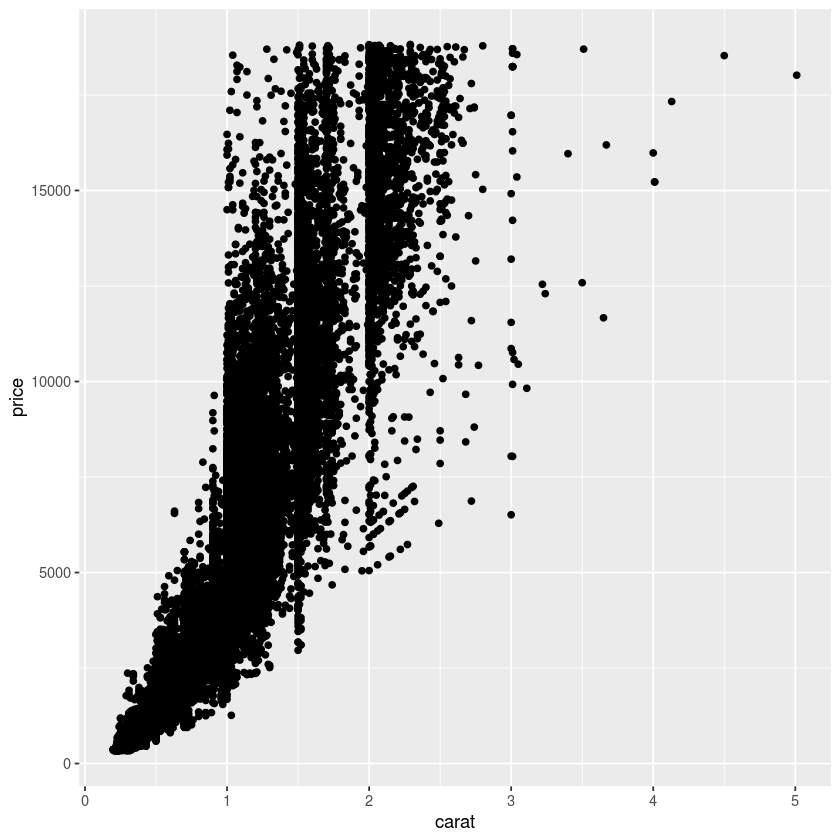

In [4]:
ggplot(data = diamonds, mapping = aes(x = carat, y = price)) + geom_point()

b) A frequency polygon showing the distrition of cut variable with carat on the x-axis shows that the density 'Fair' cut of diamond is the highest as the carat size increases. That means that fair cut is associated with large carat diamonds which obviously means a high price for the low quality diamonds.

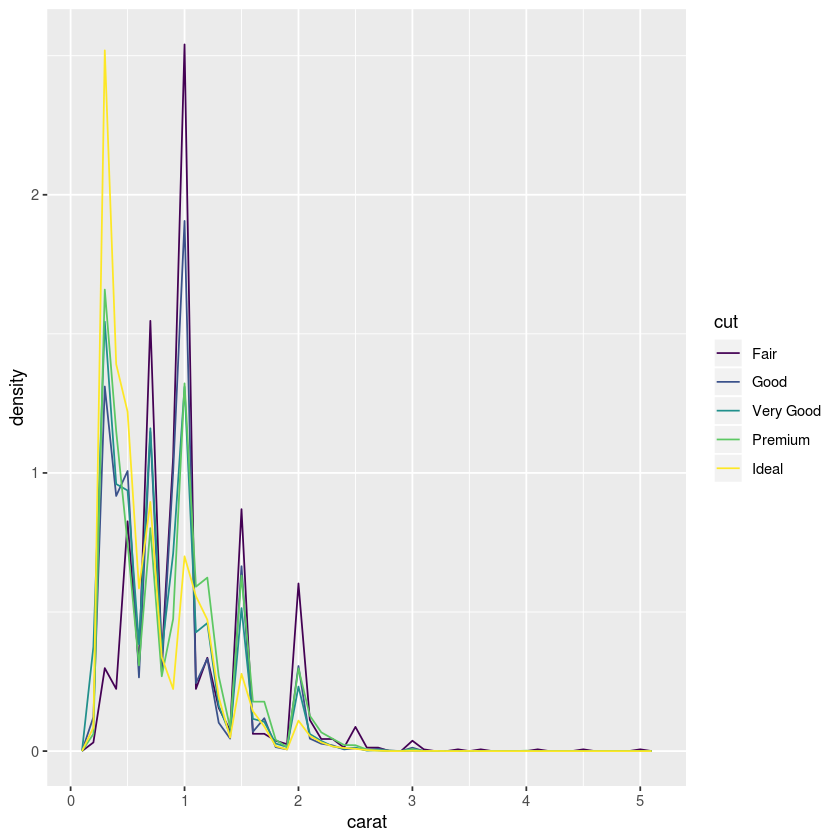

In [6]:
ggplot(data = diamonds, mapping = aes(x = carat, y = ..density..)) + 
  geom_freqpoly(mapping = aes(colour = cut), binwidth = 0.1)

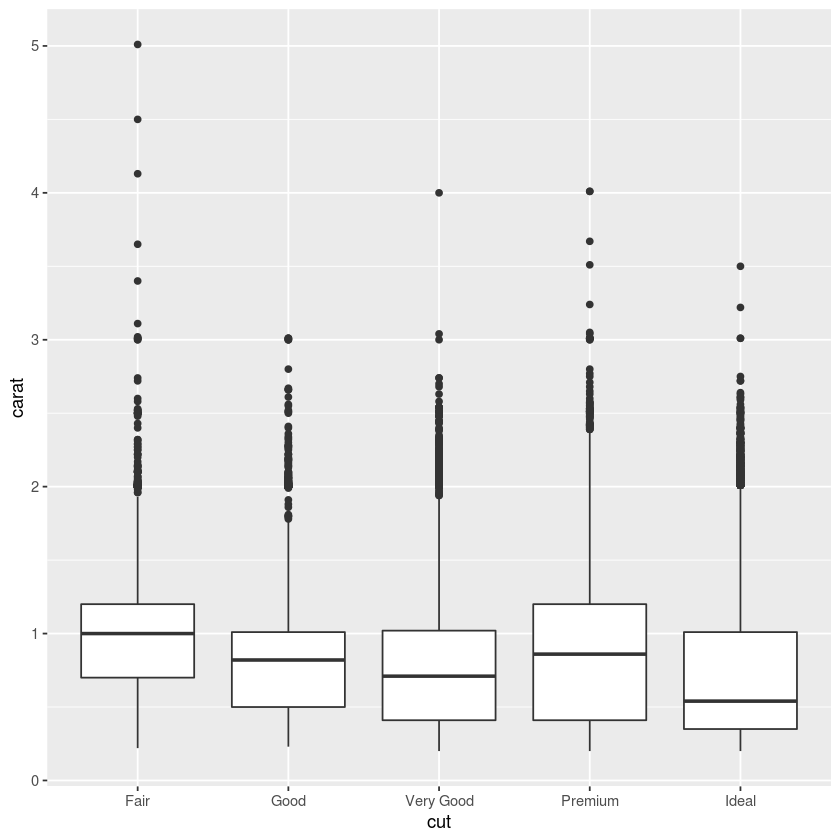

In [7]:
ggplot(data = diamonds, mapping = aes(x = cut, y = carat)) + geom_boxplot()

## 3. Install the ggstance package, and create a horizontal boxplot. How does this compare to using coord_flip()

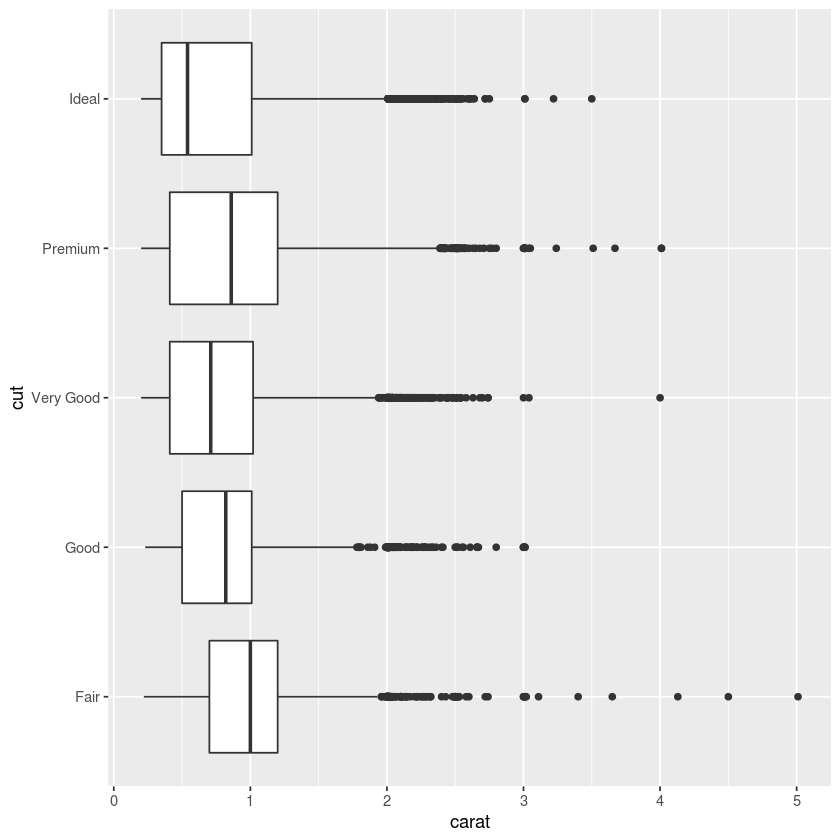

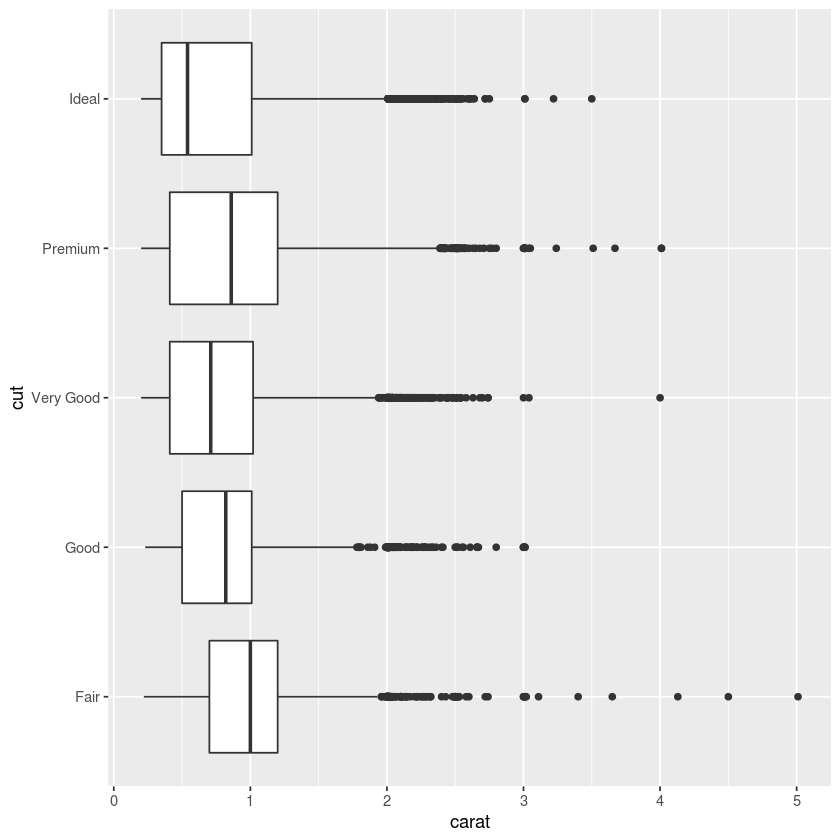

In [14]:
#using geom_boxplot
ggplot(data = diamonds, mapping = aes(x = cut, y = carat)) + geom_boxplot() + coord_flip()

#using ggstance geom_boxploth (you have to flip the x and y aesthetics to reproduce the same as above)
ggplot(data = diamonds, mapping = aes(x = carat, y = cut)) + geom_boxploth()

Seems the 2 plots above produce the same exact result. A boxplot is used to display the distribution of a continous variable, therefore the y aesthetic needs to be a continous variable, and ideally the x aesthetic represents a categorical variable (in boxploth, the x and y aesthetics are flipped since it is a horizontal version of boxplot). That is why the below codes are not the same.



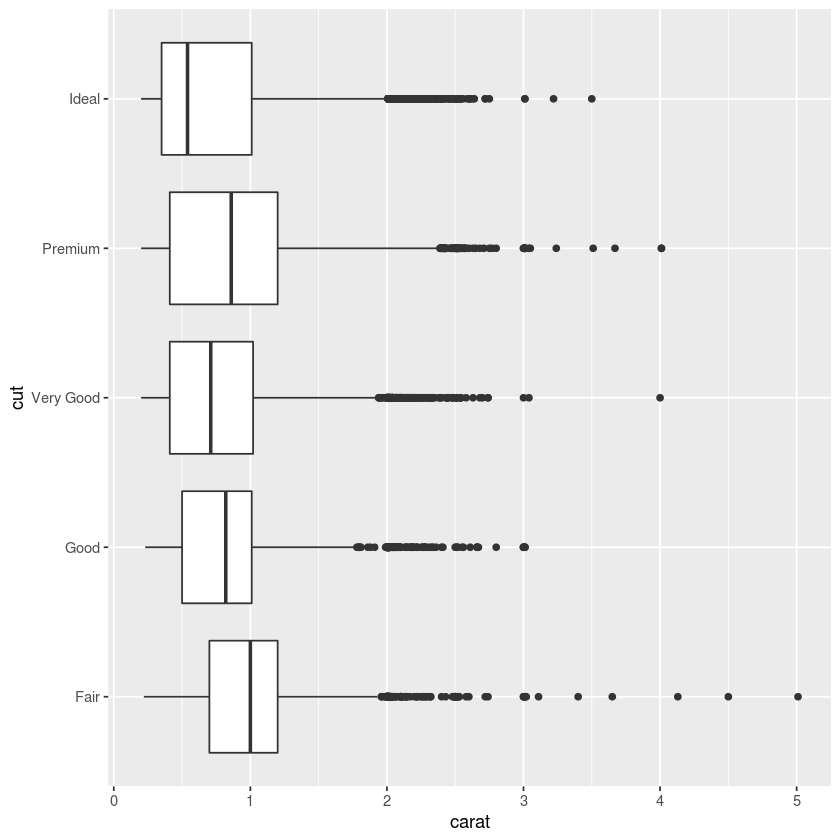

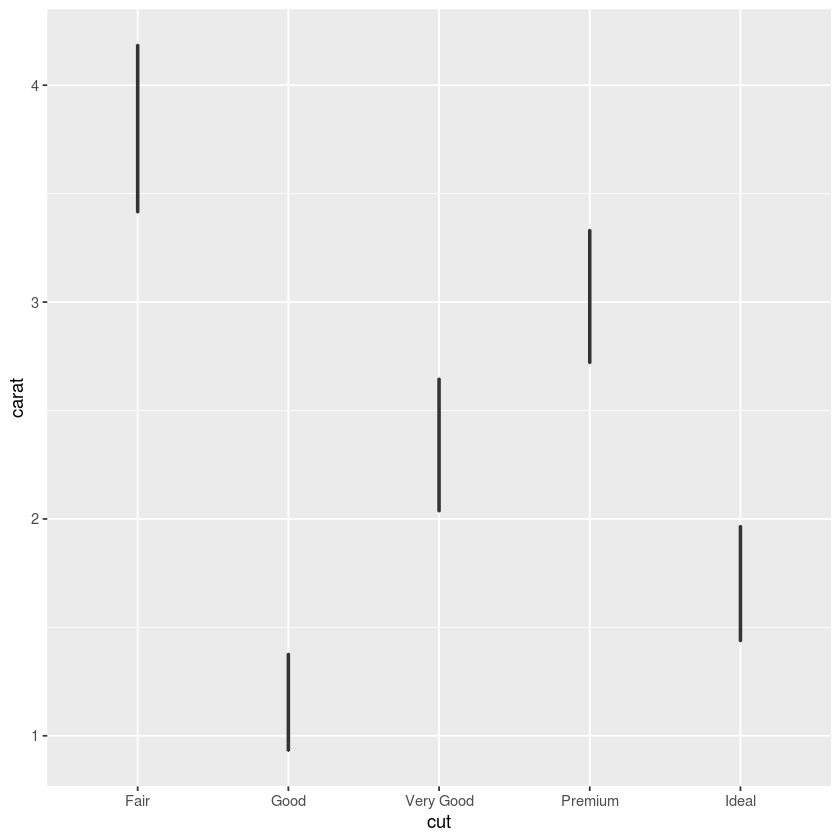

In [15]:
ggplot(data = diamonds, mapping = aes(x = cut, y = carat)) + geom_boxplot() + coord_flip()

#need to flip the x and y
ggplot(data = diamonds, mapping = aes(x = cut, y = carat)) + geom_boxploth()

## 4. One problem with boxplots is that they were developed in an era of much smaller datasets and tend to display a prohibitively large number of "outlying values". One approach to remedy this problem  is the letter value plot. Install the lvplot package, adn try using geom_lv() to display the distribution of price vs cut. What do you learn? How do you interpret the results?

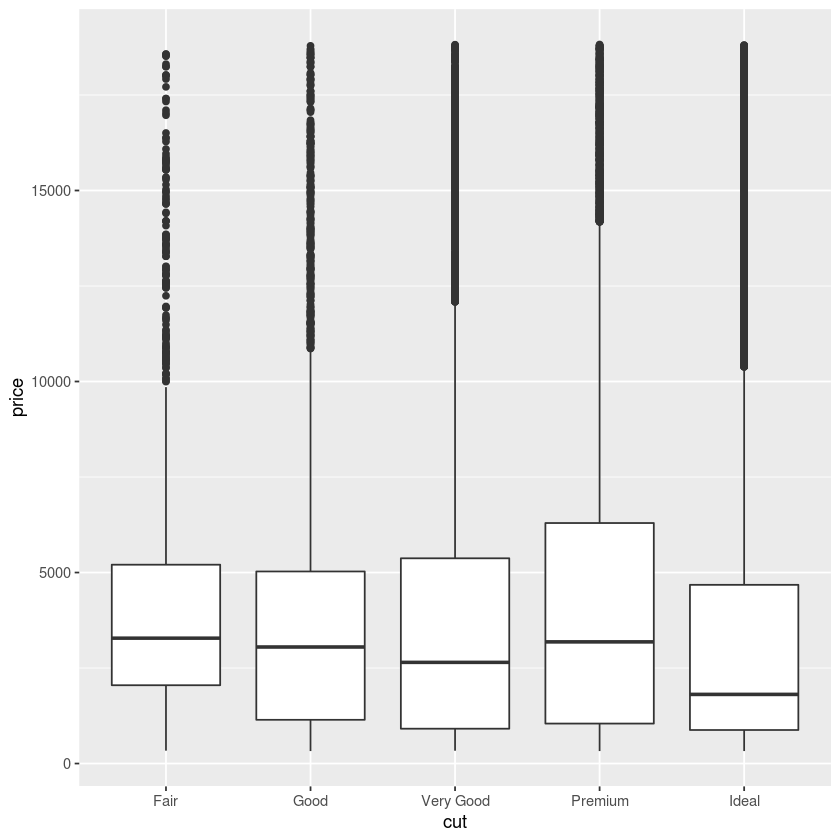

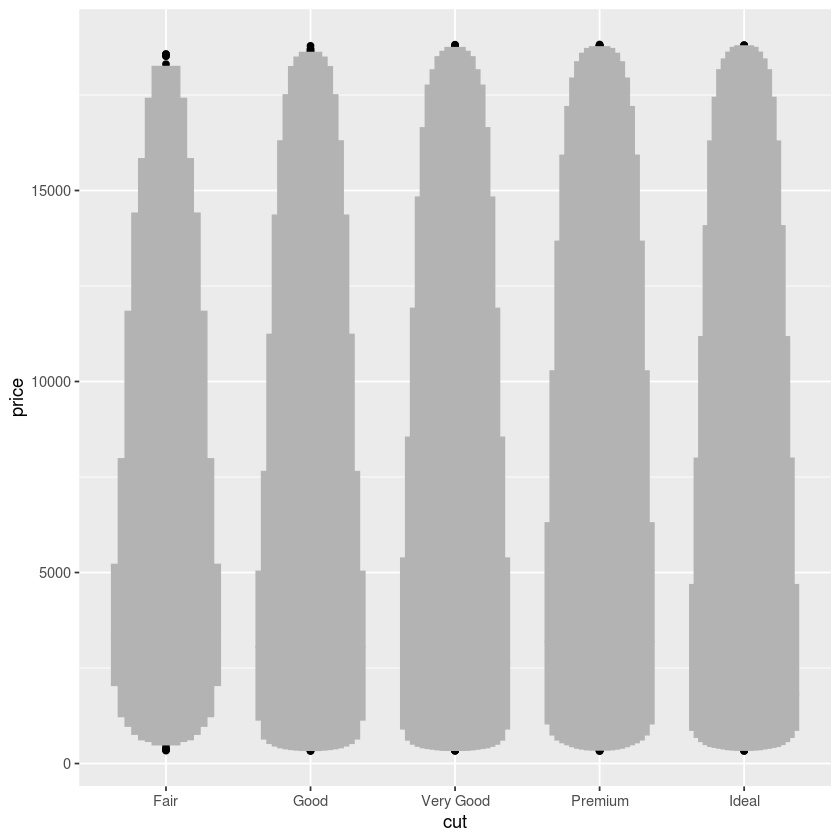

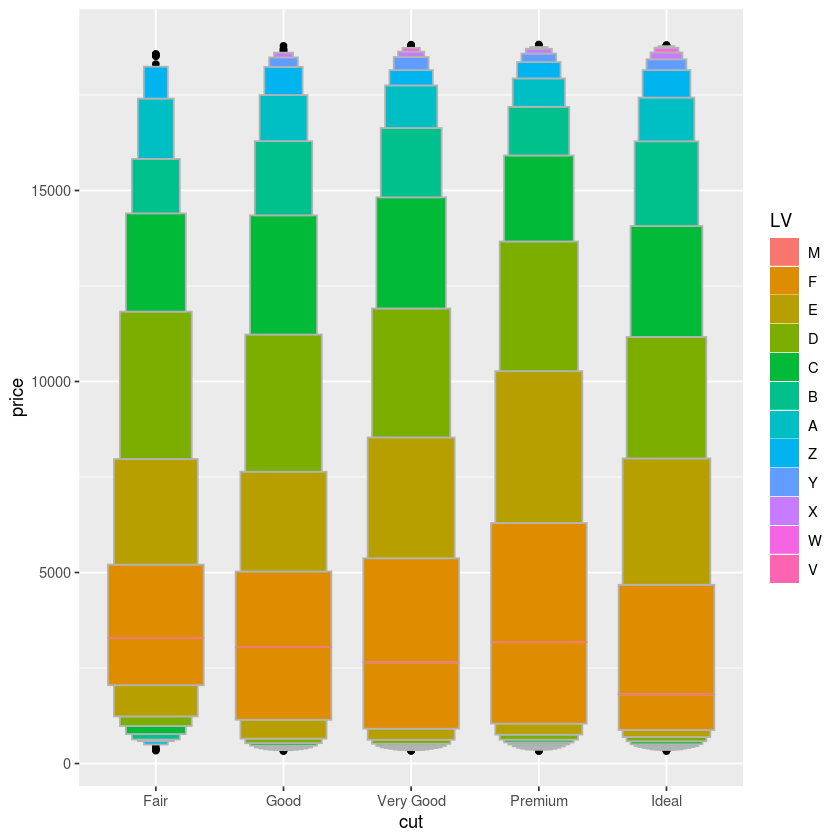

In [18]:
#Boxplot
ggplot(diamonds, aes(x = cut, y = price)) + geom_boxplot()
#letter value plot - basic
ggplot(diamonds, aes(x = cut, y = price)) + geom_lv()
#letter value plot with fill = ..LV.. aethetic
ggplot(diamonds, aes(x = cut, y = price)) + geom_lv(aes(fill = ..LV..))

Letter-value box plot is a variation of a boxplot that is useful when visualising large datasets. For large datasets, the boxplot displays many outliers, and does not take advantage of tail behaviour.

As shown the third plot above, The letter-value boxplot extends the boxplot with additional letter-values apart from boxplot's median(M) and fourths(F) adding Eighths (E), sixteenths(D), C, B, A, Z, Y, X, W, V..until the estimation error becomes too large.
The 1st plot still covers the central 50%, 2nd extends from the first to cover half of the remaining area (75% overall, 12.5% left over on each end). Third box covers another half of the remaining area(87.5 overall, 62.5% left on each side), and so on until the procedure ends and the leftover points are marked as outliers.

## 5. Compare and contrast geom_violin() with a facetted geom_histogram(), or a colored geom_freqpoly(). What are the pros and cons for each method?

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



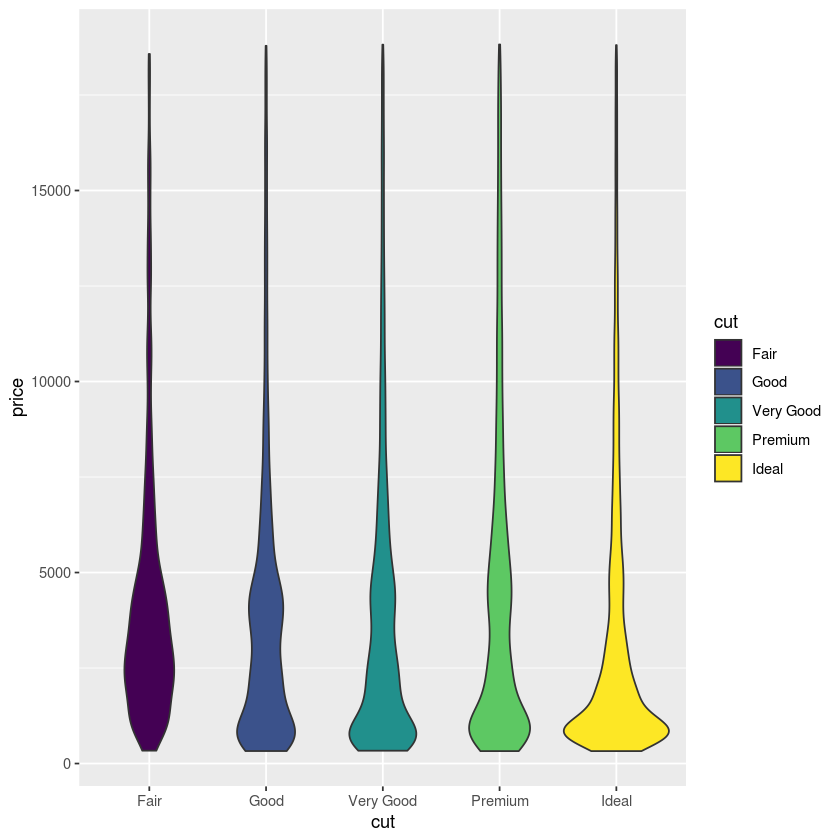

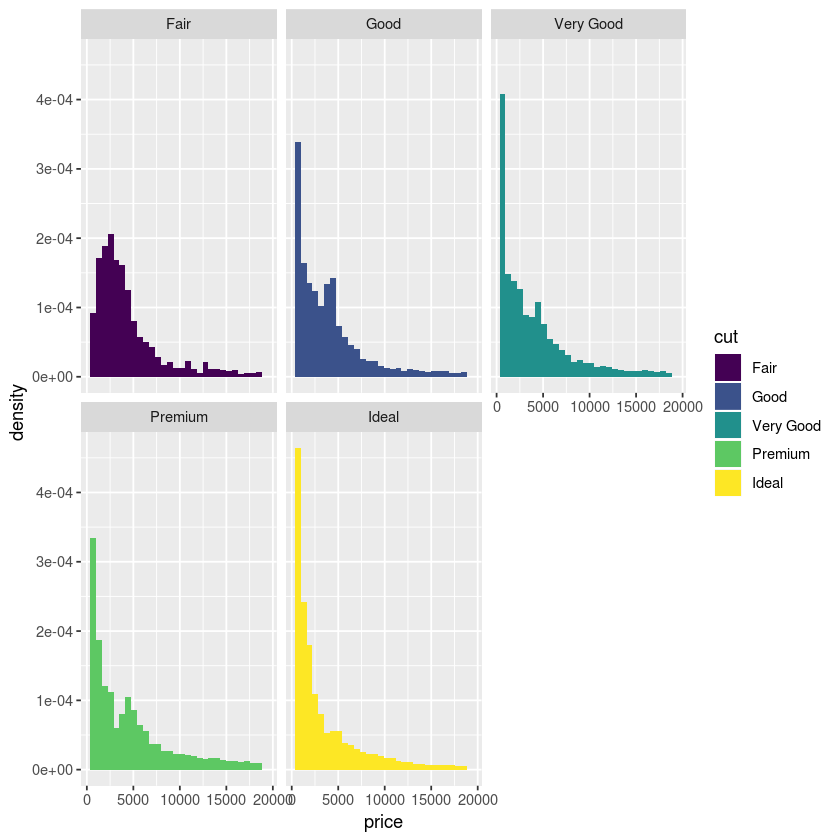

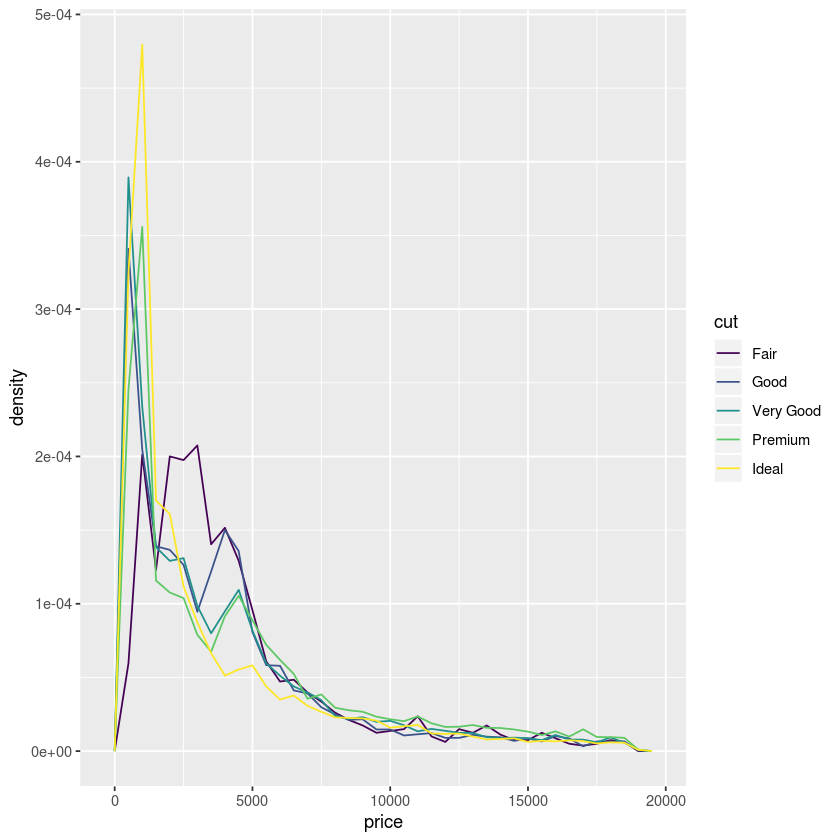

In [2]:
#geom_violin
ggplot(diamonds, aes(x = cut, y = price, fill = cut)) + geom_violin()

#facetted geom_histogram
ggplot(diamonds, aes(x = price, fill = cut)) + 
  geom_histogram(aes(y = ..density..)) + 
  facet_wrap(~cut)

#colored geom_freqpoly
ggplot(diamonds, aes(x = price)) + 
  geom_freqpoly(aes(y = ..density.., color = cut), binwidth = 500)


Answer:
**Geom_violin**

Pro - is an improvement of the geom_boxplot and it gives a better view of the distribution of data. The wider portions mean that there is more data there hence makes the plot easy to understand. It is also great for a larger dataset since all datapoints are heard.

Con - Not very good for small datasets since not all datapoints are seen.

***Facetted Geom_histogram***
Pro - Good to view the distributions of the different categories of the variable separately.

Con - Gets cluttered fast incase of many categories, making it hard to understand the data.

***Colored geom_freqpoly***
Pro - At a glance, it gives a quick idea of of the distribution of the different variable categories and how they compare with each other.

Con - Other than that, it's all just confusing.

## 6. If you have a small dataset, it's sometimes useful to use geom_jitter() to see the relationship between a continous and categorical variable. The ggbeeswarm package provides a number of methods similar to geom_jitter(). List them and briefly describe what each one does.

In [5]:
library(ggbeeswarm)

Answer

a) geom_quasirandom {ggbeeswarm}

Points, jittered to reduce overplotting using the vipor package

The quasirandom geom is a convenient means to offset points within categories to reduce overplotting. Uses the vipor package

b) geom_beeswarm {ggbeeswarm}

Points, jittered to reduce overplotting using the beeswarm package

The beeswarm geom is a convenient means to offset points within categories to reduce overplotting. Uses the beeswarm package



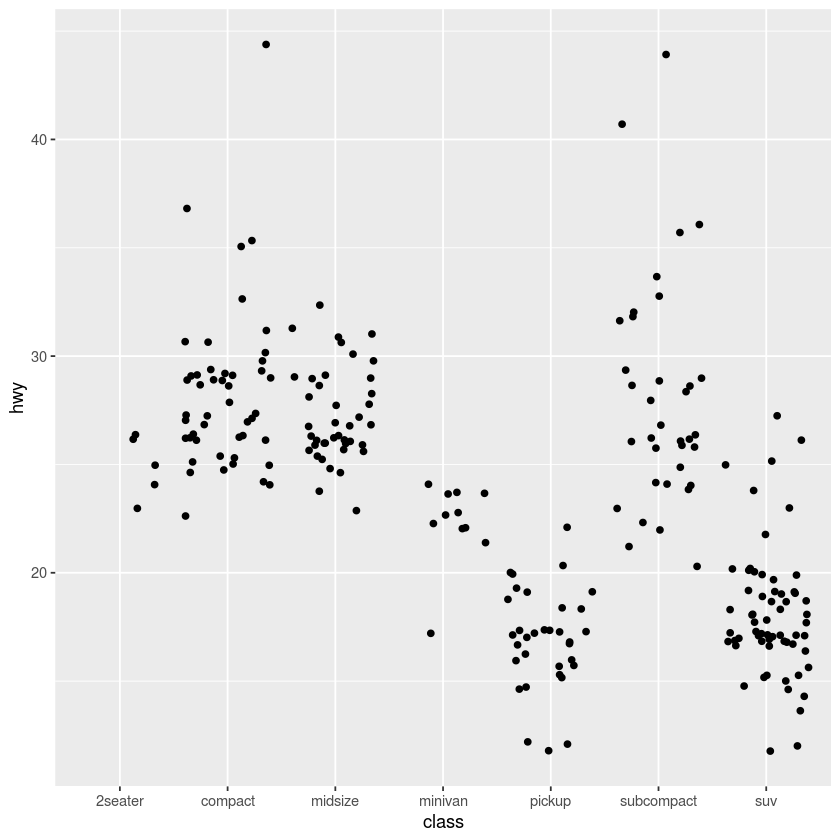

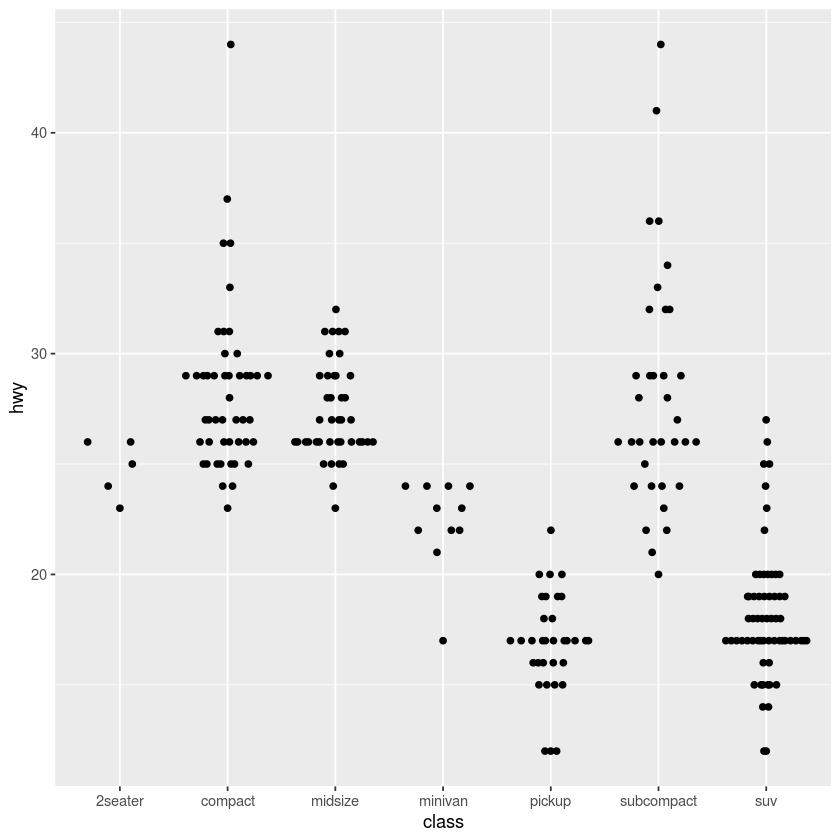

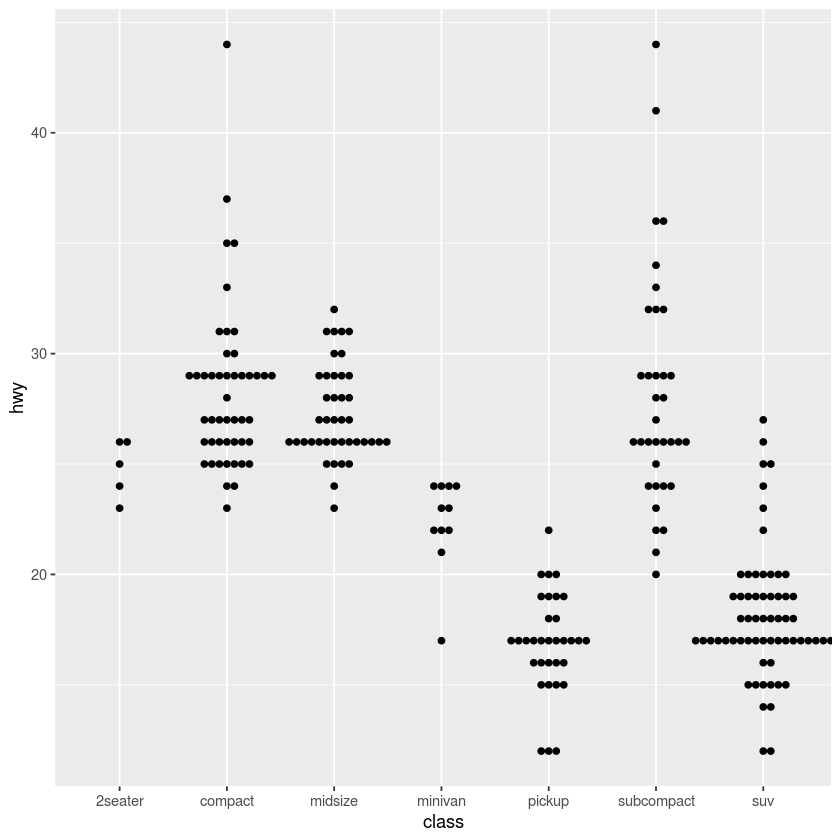

In [7]:
#geom_jitter
ggplot(data = mpg, mapping = aes(x = class, y = hwy)) + geom_jitter()

#geom_quasirandom
ggplot(data = mpg, mapping = aes(x = class, y = hwy)) + geom_quasirandom()

#geom_beeswarm
ggplot(data = mpg, mapping = aes(x = class, y = hwy)) + geom_beeswarm()

As you can see in the plots, geom_jitter provides random noise to the points. Geom_beeswarm and geom_quasirandom adds variation in a uniform pattern by default across the x-axis.
Also with geom_jitter you geta slightly different plot each time you run the line of code, while the ggbeeswarm plots produce the same plot every run.

# 7.5.2.1 Exercises

## 1. How could you rescale the count dataset above to more clearly show the distribution of cut within color, or colour within cut?

Count of cut within color, and color within cut

In [4]:
#count of cut within color
diamonds %>% count(color, cut)
#count of color within cut
diamonds %>% count(cut, color)

color,cut,n
<ord>,<ord>,<int>
D,Fair,163
D,Good,662
D,Very Good,1513
D,Premium,1603
D,Ideal,2834
E,Fair,224
E,Good,933
E,Very Good,2400
E,Premium,2337


cut,color,n
<ord>,<ord>,<int>
Fair,D,163
Fair,E,224
Fair,F,312
Fair,G,314
Fair,H,303
Fair,I,175
Fair,J,119
Good,D,662
Good,E,933


Distribution of cut within color, and color within cut using geom_tile

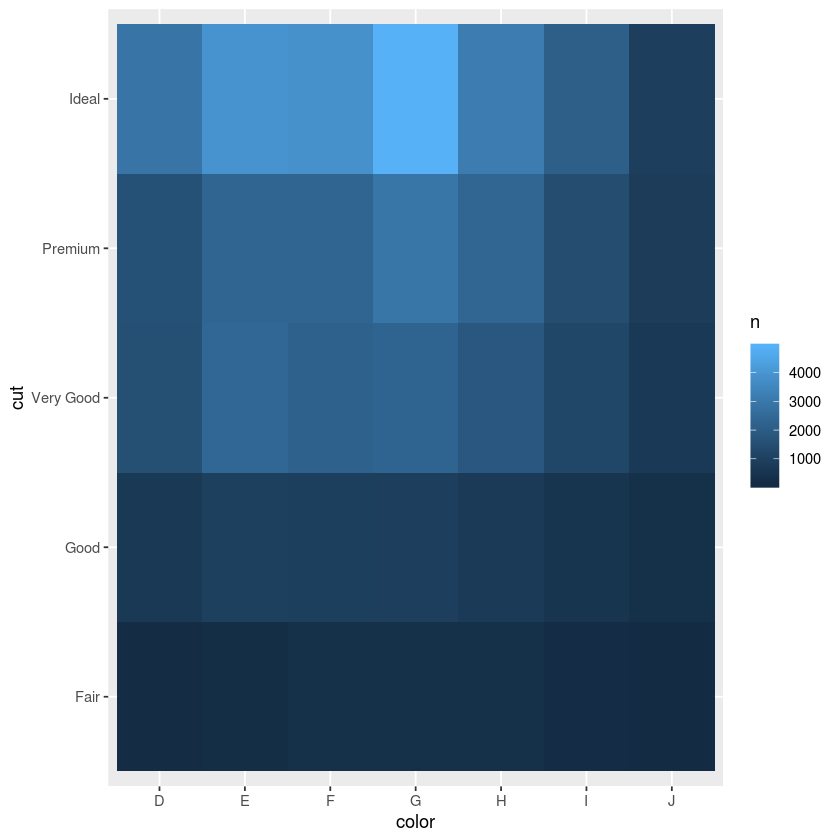

In [6]:
diamonds %>% count(color, cut) %>% arrange(desc(n)) %>% ggplot(mapping = aes(x = color, y = cut)) + 
  geom_tile(mapping = aes(fill = n))

**Answer**: To rescale the count dataset above to more clearly show the distribution, use **reoder()** to reorder the x-axis so that instead of ordering by alphabetical order which is the default, it **orders by the frequency** of the n variable (the count of every cut and color combination).

This way you can clearly see how the cut and color combinations are distributed, with the top-right showing where the highest count is.

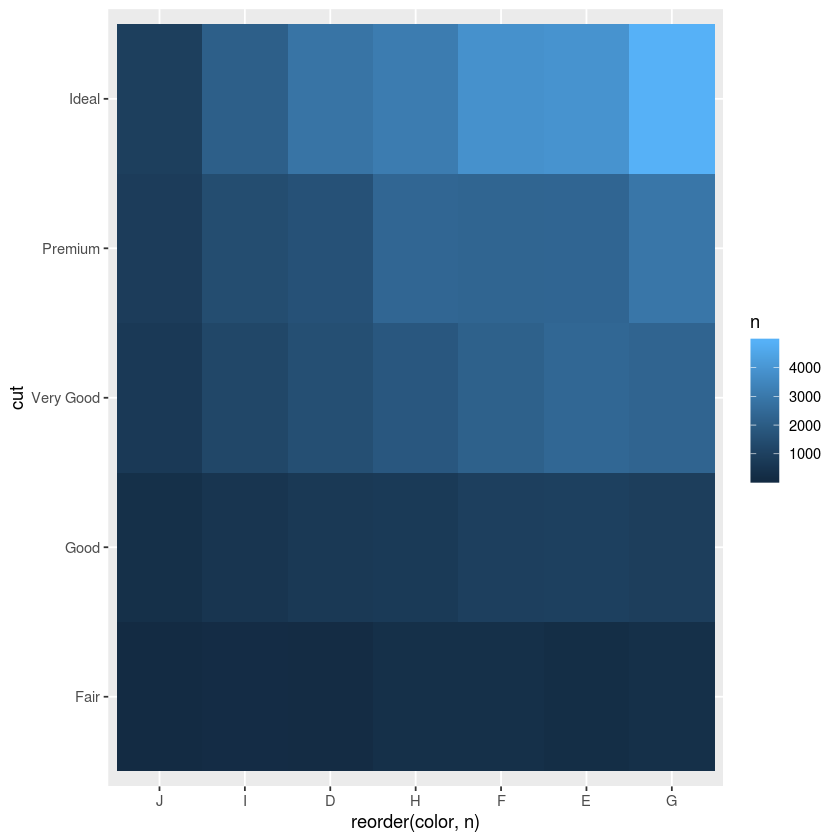

In [7]:
diamonds %>% count(color, cut) %>% ggplot(mapping = aes(x = reorder(color, n), y = cut)) + 
  geom_tile(mapping = aes(fill = n))

## 2. Use geom_tile together with dplyr to explore how average flight delays vary by destination and month of year. What makes the plot difficult to read? How could you improve it?

In [9]:
#1st get all the flights that were not cancelled, ie have actual arr_delay
not_cancelled <- flights %>% filter(!is.na(dep_delay), !is.na(arr_delay))

Display the averages of the arrival delays of the different month and destination combination. Herein we see the 1st problem: There are 1,112 rows and this will be difficult read on a geom_tile.

In [14]:
not_cancelled %>% group_by(month, dest) %>% summarise(ave = mean(arr_delay))

month,dest,ave
<int>,<chr>,<dbl>
1,ALB,35.174603
1,ATL,4.152047
1,AUS,8.715976
1,AVL,23.500000
1,BDL,10.972973
1,BHM,16.695652
1,BNA,12.702842
1,BOS,-2.537891
1,BQN,2.645161


In [19]:
#Show the different destination categories. We see that there are 104 different destinations and they will all be plotted
not_cancelled %>% count(dest)

dest,n
<chr>,<int>
ABQ,254
ACK,264
ALB,418
ANC,8
ATL,16837
AUS,2411
AVL,261
BDL,412
BGR,358


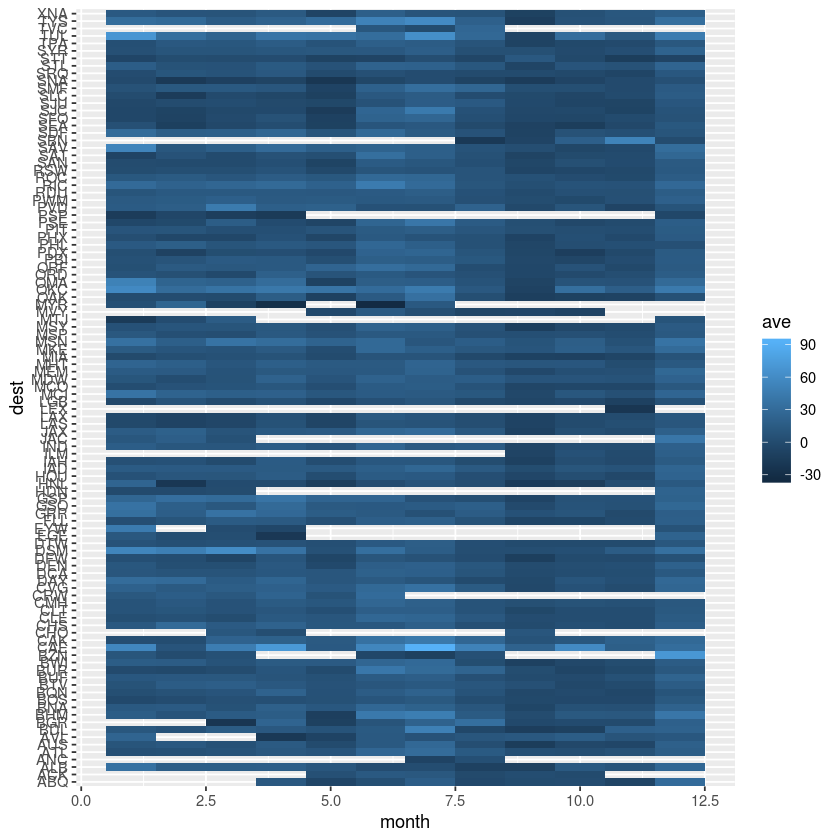

In [11]:
#Plot the geom_tile
not_cancelled %>% group_by(month, dest) %>% summarise(ave = mean(arr_delay)) %>%
  ggplot(mapping = aes(x = month, y = dest)) + geom_tile(mapping = aes(fill = ave))

The plot is difficult to read because the y-axis represents a categorical variable meaning that all 104 destinations have to be displayed.

You can improve the plot by filtering out some information. 

1. My take was to filter out all the combinations whose average delay is less than 55.
2. You can also separate the destinations into regions but we do not enough enough information to do this.

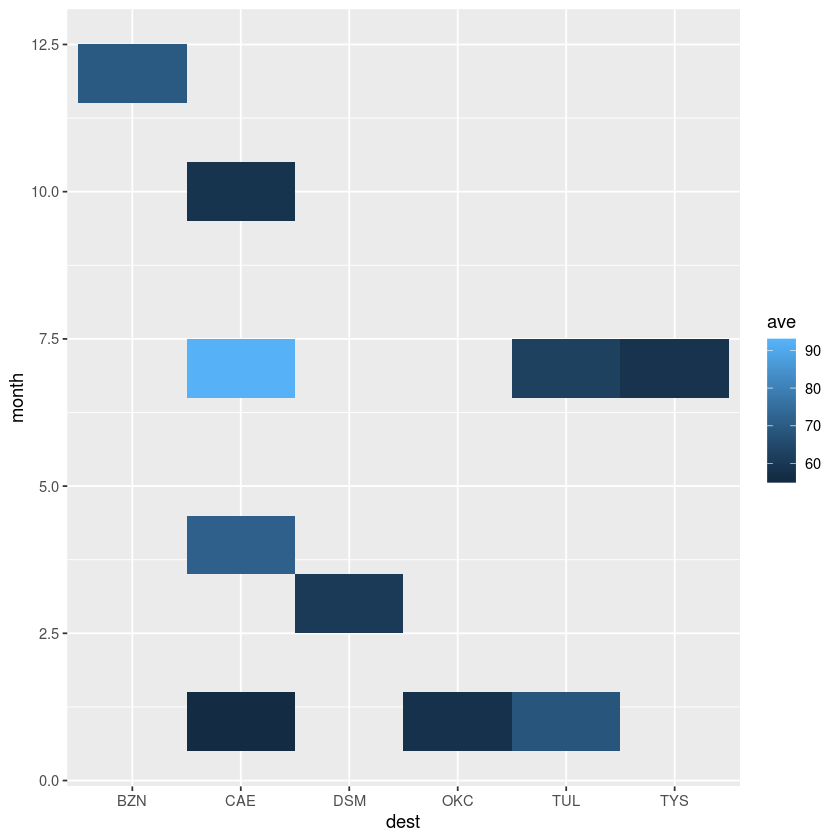

In [16]:
not_cancelled %>% group_by(month, dest) %>% summarise(ave = mean(arr_delay)) %>%
  filter(ave > 55) %>%
  ggplot(mapping = aes(x = dest, y = month)) + geom_tile(mapping = aes(fill = ave))

This shows the destinations and the months when there were very high delays (over 55 minutes)

## 3. Why is it slightly better to use aes(x = color, y = cut) rather than aes (x = cut, y = color) in the example above?

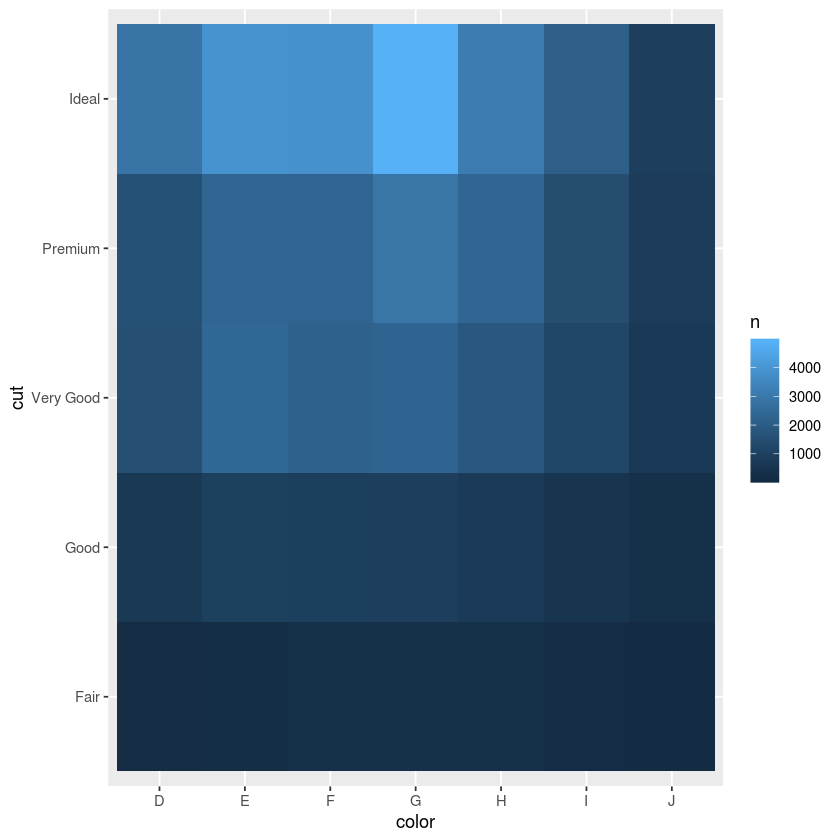

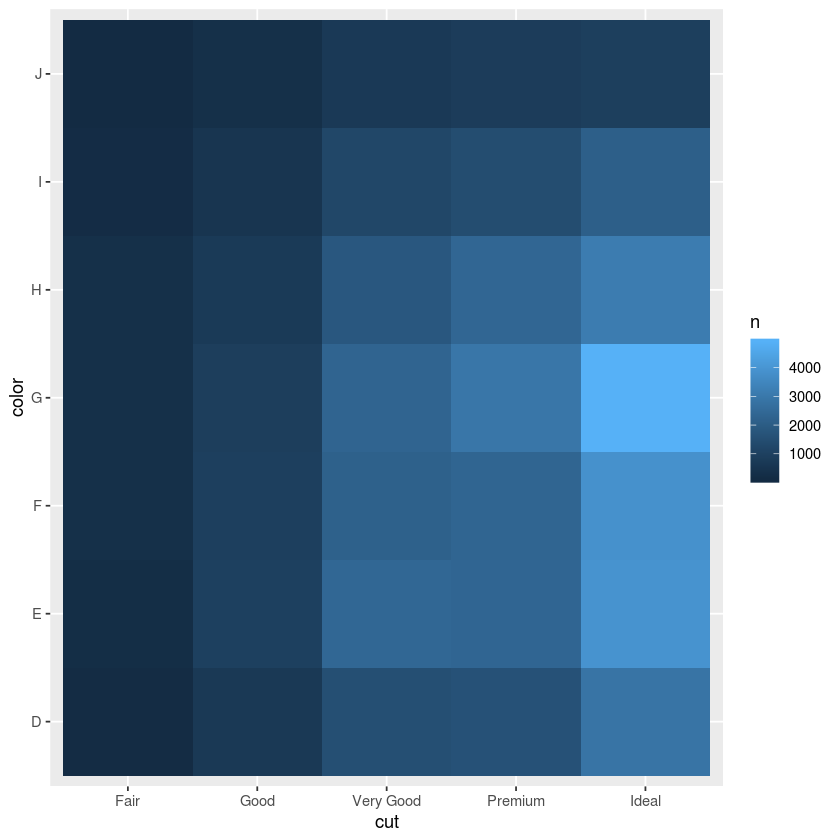

In [21]:
#better plot
diamonds %>% count(color, cut) %>% ggplot(mapping = aes(x = color, y = cut)) + 
  geom_tile(mapping = aes(fill = n))

diamonds %>% count(color, cut) %>% ggplot(mapping = aes(x = cut, y = color)) + 
  geom_tile(mapping = aes(fill = n))

Answer: One reason is that the 1st plot (where x = color and y = cut) has the high distribution data points at the top which is easier to take in on first glance. The 2nd plot has the high concentration to the right side, which makes it less intuitive to understand.

2nd reason, which does not necessarily apply to this plot, is that the variable with the long-name categories should go to the y-axis because the display is horizontal hence the entire word would be displayed hence easier to read, unlike if they were on the x-axis where the names would overlap.